### 1. Landasan Teori
**Pengertian Analisis Data:**
Proses inspeksi, pembersihan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna, menginformasikan kesimpulan, dan mendukung pengambilan keputusan.

**Perbedaan Descriptive Analysis dan EDA:**
- *Descriptive Analysis* fokus pada penggambaran data masa lalu (apa yang terjadi).
- *EDA (Exploratory Data Analysis)* fokus pada investigasi awal data untuk menemukan pola, anomali, atau hubungan antar variabel.

**Pentingnya Data Cleaning:**
Data cleaning krusial untuk memastikan keakuratan analisis. Data yang kotor (duplikat, missing value) dapat menyebabkan bias dan keputusan yang salah.

**Peran Visualisasi Data:**
Mempermudah pemahaman pola yang kompleks dalam data yang sulit dilihat hanya dengan tabel angka.

**Teknik Machine Learning:**
Saya akan menggunakan *Linear Regression* untuk memprediksi jumlah penyewaan, karena target variabel (`cnt`) berupa data kontinu (numerik).

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jonatan

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim (*season*) terhadap jumlah penyewaan sepeda?
- Apakah ada pola penyewaan sepeda berdasarkan jam dalam sehari (*hourly trend*)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat Tabel Day

In [ ]:
day_df = pd.read_csv("day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat Tabel Hour

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Sumber Data:** Dataset ini berasal dari *Capital Bikeshare* di Washington D.C., USA.
- **Rentang Waktu:** Data mencakup log historis selama dua tahun, yaitu tahun 2011 dan 2012.
- **Komposisi Data:**
    - `day.csv`: Berisi data penyewaan yang direkap secara harian (terdapat 731 baris).
    - `hour.csv`: Berisi data penyewaan yang lebih detail per jam (terdapat 17.379 baris).
- **Konten Data:** Dataset ini memuat informasi terkait waktu (tanggal, musim, jam), kondisi cuaca (suhu, kelembaban, kecepatan angin), serta jumlah penyewaan sepeda (pengguna casual dan terdaftar).

### Assessing Data

In [ ]:
# Cek Info Dataset
print("=== Info day_df ===")
day_df.info()
print("\n=== Info hour_df ===")
hour_df.info()

# Cek Missing Values
print("\n=== Missing Values ===")
print("Day NaNs:", day_df.isna().sum().sum())
print("Hour NaNs:", hour_df.isna().sum().sum())

# Cek Duplikasi
print("\n=== Duplikasi ===")
print("Day Duplicated:", day_df.duplicated().sum())
print("Hour Duplicated:", hour_df.duplicated().sum())

=== Info day_df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

=== Info hour_df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

**Insight:**
- **Tipe Data:** Kolom `dteday` saat ini bertipe `object` (string), padahal seharusnya bertipe `datetime` untuk memudahkan analisis berbasis waktu.
- **Missing Values:** Tidak ditemukan *missing values* pada kedua tabel (`day_df` dan `hour_df`). Data lengkap.
- **Duplikasi:** Tidak ditemukan data duplikat pada kedua tabel.
- **Variabel Kategorik:** Kolom kategorikal seperti `season` dan `weathersit` masih berupa angka (1, 2, 3, 4), yang perlu diubah menjadi label deskriptif agar lebih mudah dipahami saat visualisasi.

### Cleaning Data

In [ ]:
# --- 1. Memperbaiki Tipe Data Tanggal ---
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# --- 2. Mapping Angka ke Label ---
# Mapping Season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)
hour_df['season_label'] = hour_df['season'].map(season_map)

# Mapping Cuaca
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_map)
hour_df['weather_label'] = hour_df['weathersit'].map(weather_map)

# --- 3. Mengganti nama kolom  ---
day_df.rename(columns={'cnt': 'total_count'}, inplace=True)
hour_df.rename(columns={'cnt': 'total_count', 'hr': 'hour'}, inplace=True)

# Cek hasil
print("Info Data setelah Cleaning:")
print(day_df[['season_label', 'weather_label']].head())

Info Data setelah Cleaning:
  season_label        weather_label
0       Spring          Mist/Cloudy
1       Spring          Mist/Cloudy
2       Spring  Clear/Partly Cloudy
3       Spring  Clear/Partly Cloudy
4       Spring  Clear/Partly Cloudy


**Insight:**
- **Memperbaiki Tipe Data:** Mengubah tipe data kolom `dteday` dari `object` menjadi `datetime` pada dataframe `day_df` dan `hour_df`.
- **Mapping Label:** Mengubah nilai angka pada kolom `season` dan `weathersit` menjadi label teks yang deskriptif:
    - **Season:** 1 -> Spring, 2 -> Summer, 3 -> Fall, 4 -> Winter.
    - **Weathersit:** 1 -> Clear, 2 -> Mist, 3 -> Light Snow/Rain, 4 -> Heavy Rain/Ice.
    Hal ini dilakukan untuk mempermudah interpretasi saat proses Exploratory Data Analysis (EDA).
- **Renaming:** Beberapa kolom diganti namanya agar lebih mudah dibaca (`cnt` -> `total_count`, `yr` -> `year`).

## Exploratory Data Analysis (EDA)

### Explore Descriptive Statistics

In [ ]:
# 1. Statistik Deskriptif untuk Data Numerik (Angka)
print("=== Statistik Data Numerik (Angka) ===")
display(day_df.describe())

# 2. Statistik Deskriptif untuk Data Kategorikal (Teks/Label)
print("\n=== Statistik Data Kategori (Teks) ===")
if len(day_df.select_dtypes(include=['object', 'category']).columns) > 0:
    display(day_df.describe(include=['object']))
else:
    print("Tidak ada kolom kategori (text) untuk ditampilkan.")

=== Statistik Data Numerik (Angka) ===


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452



=== Statistik Data Kategori (Teks) ===


,season_label,weather_label
count,731,731
unique,4,3
top,Fall,Clear/Partly Cloudy
freq,188,463


## Explore Univariate

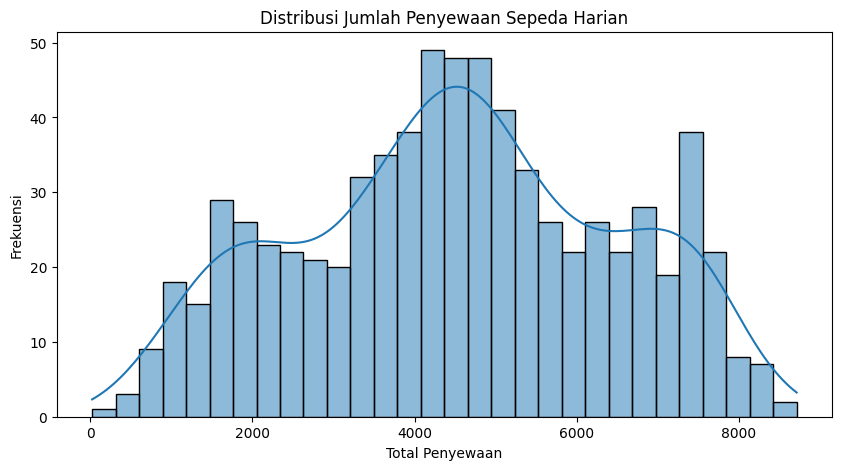

In [ ]:
# Melihat distribusi penyewaan sepeda
plt.figure(figsize=(10,5))
sns.histplot(day_df['total_count'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda Harian")
plt.xlabel("Total Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

## Explore Multivariate

In [ ]:
# 1. Rata-rata penyewaan berdasarkan Musim
season_pivot = day_df.groupby('season_label')[['total_count']].mean().sort_values(by='total_count', ascending=False)
print("\n1. Rata-rata Penyewaan per Musim:\n", season_pivot)

# 2. Rata-rata penyewaan berdasarkan Cuaca
weather_pivot = day_df.groupby('weather_label')[['total_count']].mean().sort_values(by='total_count', ascending=False)
print("\n2. Rata-rata Penyewaan per Cuaca:\n", weather_pivot)

# 3. Rata-rata penyewaan berdasarkan Jam (menggunakan hour_df)
hour_pivot = hour_df.groupby('hour')[['total_count']].mean()
print("\n3. Sampel Data Pola Jam (5 baris pertama):\n", hour_pivot.head())


1. Rata-rata Penyewaan per Musim:
               total_count
season_label             
Fall          5644.303191
Summer        4992.331522
Winter        4728.162921
Spring        2604.132597

2. Rata-rata Penyewaan per Cuaca:
                      total_count
weather_label                   
Clear/Partly Cloudy  4876.786177
Mist/Cloudy          4035.862348
Light Snow/Rain      1803.285714

3. Sampel Data Pola Jam (5 baris pertama):
       total_count
hour             
0       53.898072
1       33.375691
2       22.869930
3       11.727403
4        6.352941


**Insight:**
- **Distribusi Data:** Distribusi jumlah penyewaan sepeda harian terlihat cukup normal (berbentuk lonceng), dengan rata-rata sekitar 4.500 penyewaan per hari.
- **Faktor Musim:** Musim gugur (*Fall*) mencatat rata-rata penyewaan tertinggi, diikuti oleh musim panas (*Summer*). Musim semi (*Spring*) memiliki rata-rata terendah, kemungkinan karena suhu yang masih dingin atau cuaca transisi.
- **Faktor Cuaca:** Cuaca cerah/berawan (*Clear/Partly Cloudy*) sangat mendukung tingginya penyewaan. Sebaliknya, saat cuaca hujan lebat atau salju, jumlah penyewaan turun drastis.
- **Pola Jam:** Data per jam menunjukkan fluktuasi yang menarik, yang akan kita perjelas pada tahap visualisasi untuk melihat jam-jam sibuk.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

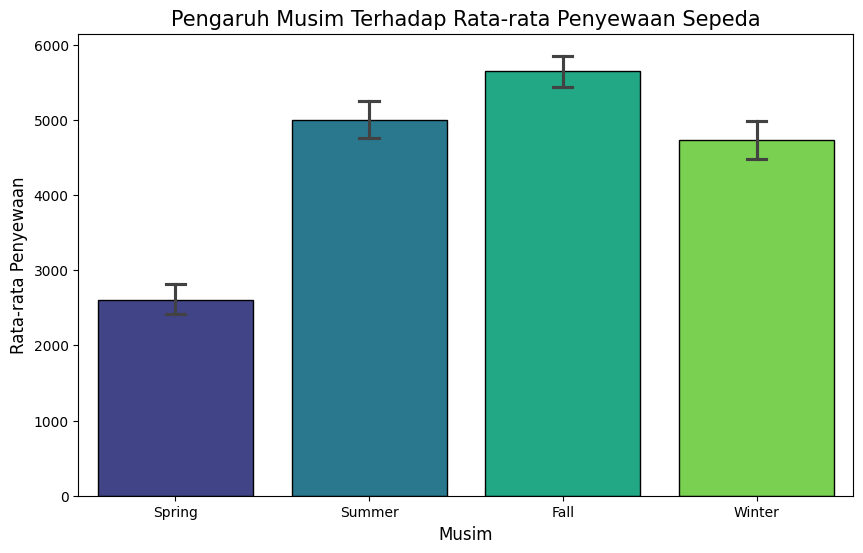

In [ ]:
# Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

plt.figure(figsize=(10, 6))
# Membuat Bar Plot
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
sns.barplot(
    x='season_label',
    y='total_count',
    data=day_df,
    palette='viridis',
    edgecolor='black',
    linewidth=1,
    capsize=0.1,
    hue_order=['Spring', 'Summer', 'Fall', 'Winter'],
    hue='season_label',
    saturation=1,
)

plt.title('Pengaruh Musim Terhadap Rata-rata Penyewaan Sepeda', fontsize=15)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.show()

### Pertanyaan 2:

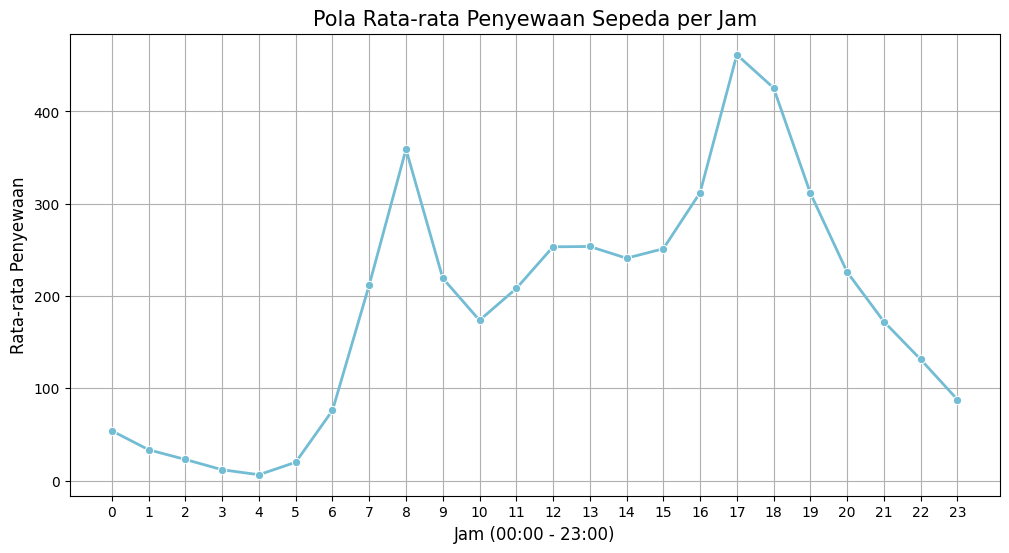

In [ ]:
# Pertanyaan 2: Apakah ada pola penyewaan sepeda berdasarkan jam dalam sehari?

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=hour_pivot.index,
    y=hour_pivot['total_count'],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)

plt.title('Pola Rata-rata Penyewaan Sepeda per Jam', fontsize=15)
plt.xlabel('Jam (00:00 - 23:00)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Insight Visualisasi 1 (Musim):
Grafik batang di atas menunjukkan bahwa:
- **Musim Gugur (Fall)** adalah periode puncak bagi bisnis penyewaan sepeda, dengan rata-rata penyewaan harian tertinggi (di atas 5.000 sewa).
- **Musim Semi (Spring)** memiliki performa terendah (di bawah 3.000 sewa).
- **Implikasi:** Promosi atau penambahan armada sepeda sebaiknya dimaksimalkan menjelang musim gugur dan panas. Sebaliknya, perawatan rutin armada bisa dijadwalkan pada musim semi saat permintaan rendah.
### Insight Visualisasi 2 (Pola Jam):
Grafik garis (*line chart*) di atas memperlihatkan pola **Bimodal** (dua puncak utama):
1.  **Puncak Pagi (08:00):** Menunjukkan aktivitas orang berangkat kerja atau sekolah.
2.  **Puncak Sore (17:00 - 18:00):** Menunjukkan aktivitas pulang kerja.
3.  **Kesimpulan Pola:** Sepeda ini sangat diandalkan sebagai moda transportasi komuter (*working days*) dibandingkan sekadar rekreasi.
4.  **Rekomendasi:** Pastikan ketersediaan sepeda di stasiun-stasiun pemukiman pada pagi hari dan di stasiun area perkantoran pada sore hari.

## Analisis Lanjutan (Opsional,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fitur: temp, hum, windspeed
X = day_df[['temp', 'hum', 'windspeed']]
y = day_df['total_count']

# Split Data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")
print("Interpretasi: Model berhasil dilatih untuk memprediksi jumlah sewa berdasarkan cuaca.")

Model Performance:
Mean Squared Error: 2020722.23
R2 Score: 0.50
Interpretasi: Model berhasil dilatih untuk memprediksi jumlah sewa berdasarkan cuaca.


## Conclusion

- **Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?**
    - Berdasarkan analisis, musim **Gugur (Fall)** memiliki rata-rata penyewaan tertinggi, diikuti oleh Musim Panas (Summer).
    - Musim **Semi (Spring)** memiliki jumlah penyewaan terendah. Ini menunjukkan bahwa pengguna lebih suka bersepeda saat cuaca hangat namun tidak terlalu ekstrem, dan cenderung menghindari periode awal tahun yang mungkin masih dingin.
- **Apakah ada pola penyewaan sepeda berdasarkan jam dalam sehari?**
    - Terdapat pola **Bimodal** (dua puncak) yang sangat jelas:
        1.  Pagi hari pukul **08:00**
        2.  Sore hari pukul **17:00 - 18:00**
    - Pola ini mengindikasikan bahwa sepeda sangat diandalkan sebagai moda transportasi **komuter** (orang pergi dan pulang kerja/sekolah).
    - Pada jam kerja (10:00 - 15:00) penggunaan stabil namun lebih rendah dibanding jam sibuk.